In [ ]:
pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=1c192e61c895fac9d42339747243353db741c4fb58854ff420c5e3221cf19b9b
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 16.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,Convolution2D,MaxPooling2D
from keras.utils import np_utils
from keras.datasets import fashion_mnist

In [ ]:
from ann_visualizer.visualize import ann_viz
import visualkeras

In [ ]:
(Xtrain,Ytrain),(Xtest,Ytest) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


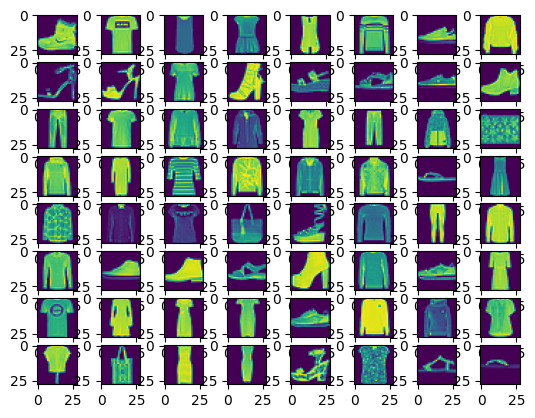

In [ ]:
for i in range(64):
  plt.subplot(8,8,i+1)
  plt.imshow(Xtrain[i])



In [ ]:
print(Ytrain[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
Xtrain.shape

(60000, 28, 28, 1)

In [ ]:
Xtrain = Xtrain.reshape(Xtrain.shape[0],28,28,1)
Xtest = Xtest.reshape(Xtest.shape[0],28,28,1)

In [ ]:
Xtrain.dtype

dtype('uint8')

In [ ]:
Xtrain = Xtrain.astype('float32')

In [ ]:
Xtest = Xtest.astype('float32')

In [ ]:
Xtrain/=255

In [ ]:
Xtest/=255

In [ ]:
Ytrain = np_utils.to_categorical(Ytrain,10)

In [ ]:
Ytest = np_utils.to_categorical(Ytest,10)

In [ ]:
print(Ytrain)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 32)         0

In [ ]:
model.compile(loss ="categorical_crossentropy",optimizer="adam",metrics = ["accuracy"])

In [ ]:
ann_viz(model,view= True,filename="fasion mnist",title="Fasion_mnist")

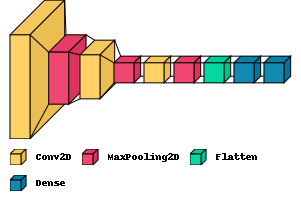

In [ ]:
visualkeras.layered_view(model,legend=True)

In [ ]:
from tensorflow.keras.utils import plot_model

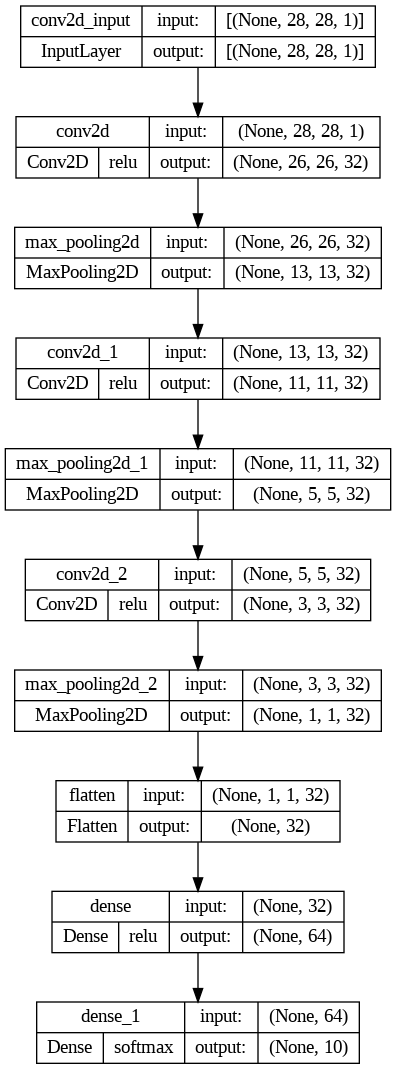

In [ ]:
plot_model(model,show_shapes=True,show_dtype=False,to_file="Fashion_minst.png",show_layer_names=True,expand_nested=True,dpi=96,layer_range= None,show_layer_activations=True)

In [ ]:
model.fit(Xtrain,Ytrain,batch_size=256,epochs=100)

Epoch 1/100
235/235 [==============================] - 2s 6ms/step - loss: 0.1460 - accuracy: 0.9472
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1433 - accuracy: 0.9485
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1427 - accuracy: 0.9483
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1402 - accuracy: 0.9493
Epoch 5/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1403 - accuracy: 0.9499
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1391 - accuracy: 0.9498
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1378 - accuracy: 0.9503
Epoch 8/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1350 - accuracy: 0.9510
Epoch 9/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1346 - accuracy: 0.9513
Epoch 10/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1325 - accura

In [ ]:
pred = model.predict(Xtest[np.newaxis,1])

1/1 [==============================] - 0s 197ms/step


In [ ]:
pred

array([[1.2756859e-16, 7.3987841e-38, 9.9999988e-01, 3.0895930e-09,
        3.8989515e-12, 0.0000000e+00, 1.1941493e-07, 0.0000000e+00,
        1.9685368e-25, 0.0000000e+00]], dtype=float32)

In [ ]:
perdiction = pred.argmax(axis = 1)

In [ ]:
perdiction

array([2])

In [ ]:
print(perdiction[0])

2


In [ ]:
img = (Xtest[1]*255).reshape((28,28)).astype('uint8')

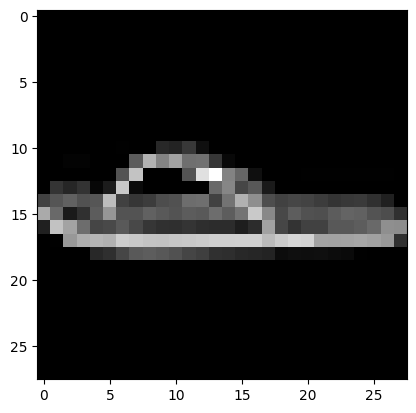

In [ ]:
plt.imshow(img, cmap='gray')
plt.show()

1/1 [==============================] - 0s 30ms/step


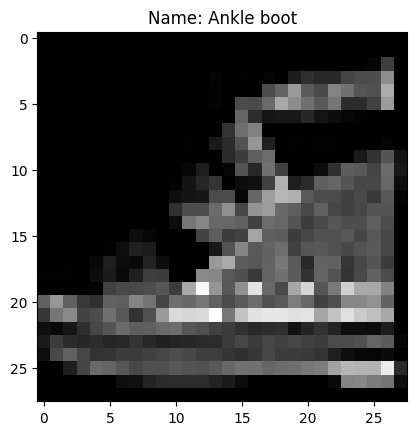

1/1 [==============================] - 0s 21ms/step


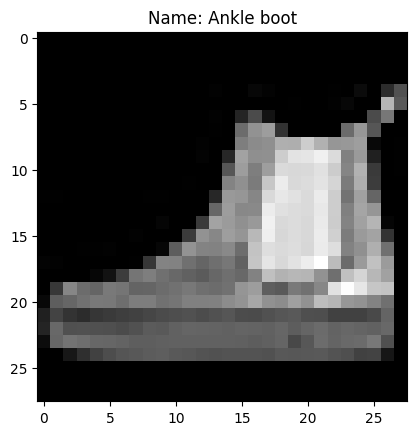

1/1 [==============================] - 0s 20ms/step


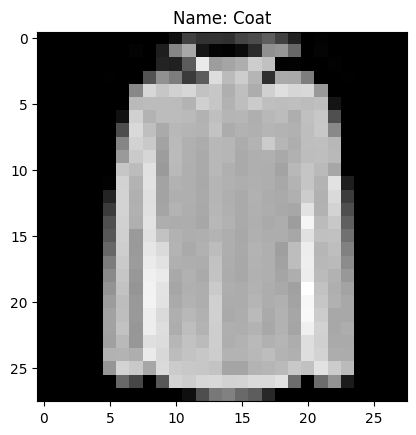

1/1 [==============================] - 0s 29ms/step


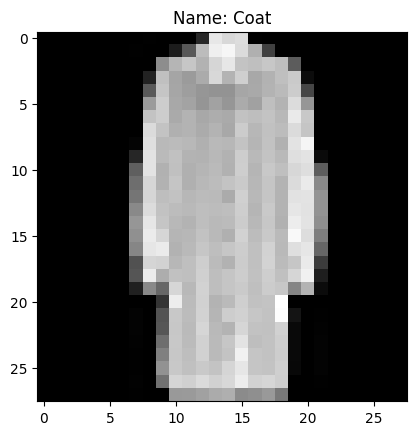

1/1 [==============================] - 0s 19ms/step


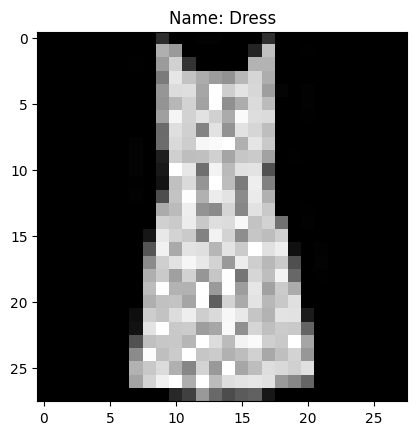

1/1 [==============================] - 0s 20ms/step


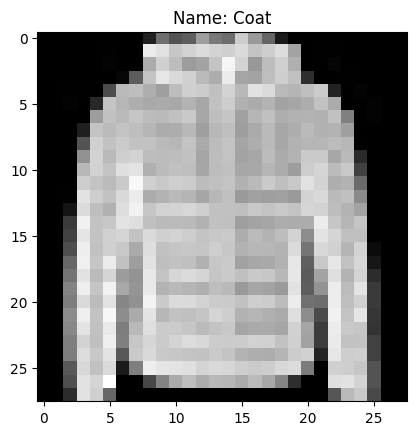

1/1 [==============================] - 0s 20ms/step


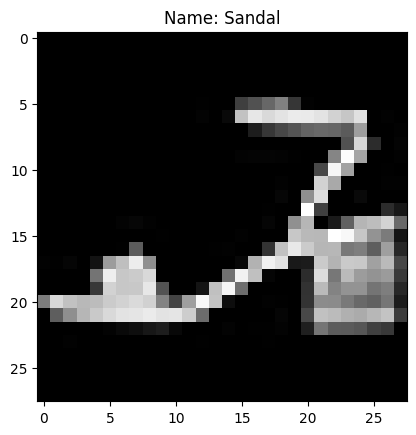

1/1 [==============================] - 0s 20ms/step


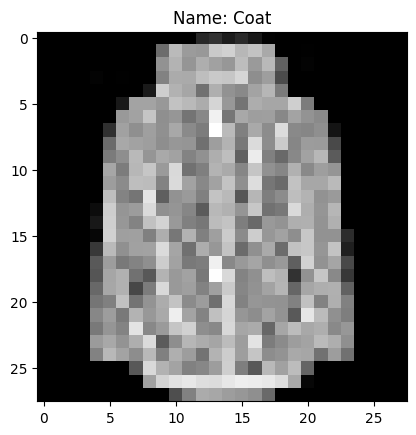

1/1 [==============================] - 0s 18ms/step


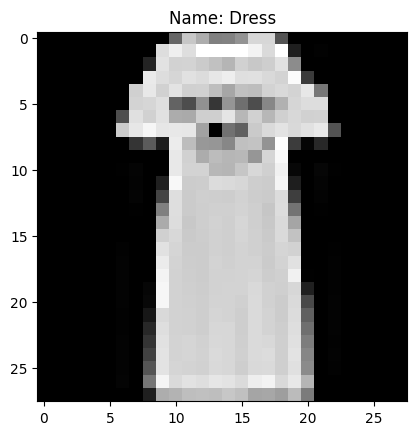

1/1 [==============================] - 0s 19ms/step


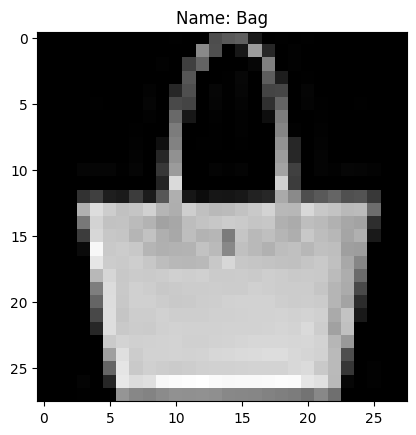

In [ ]:
dress_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]
for i in np.random.choice(np.arange(0, len(Ytest)), size=(10,)):
    pred = model.predict(Xtest[np.newaxis, i])
    prediction = pred.argmax(axis=1)
    img = (Xtest[i] * 255).reshape((28, 28)).astype('uint8')
    plt.imshow(img, cmap='gray')
    plt.title('Name: ' + dress_names[prediction[0]])
    plt.show()